In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
housing = pd.read_csv('/content/drive/MyDrive/BOSTON - BOSTON.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,NaN,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.278840,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703023,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.195000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      501 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PTRAT   506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing['CHAS'].value_counts()

,count
CHAS,
0,471
1,35


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRAT'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

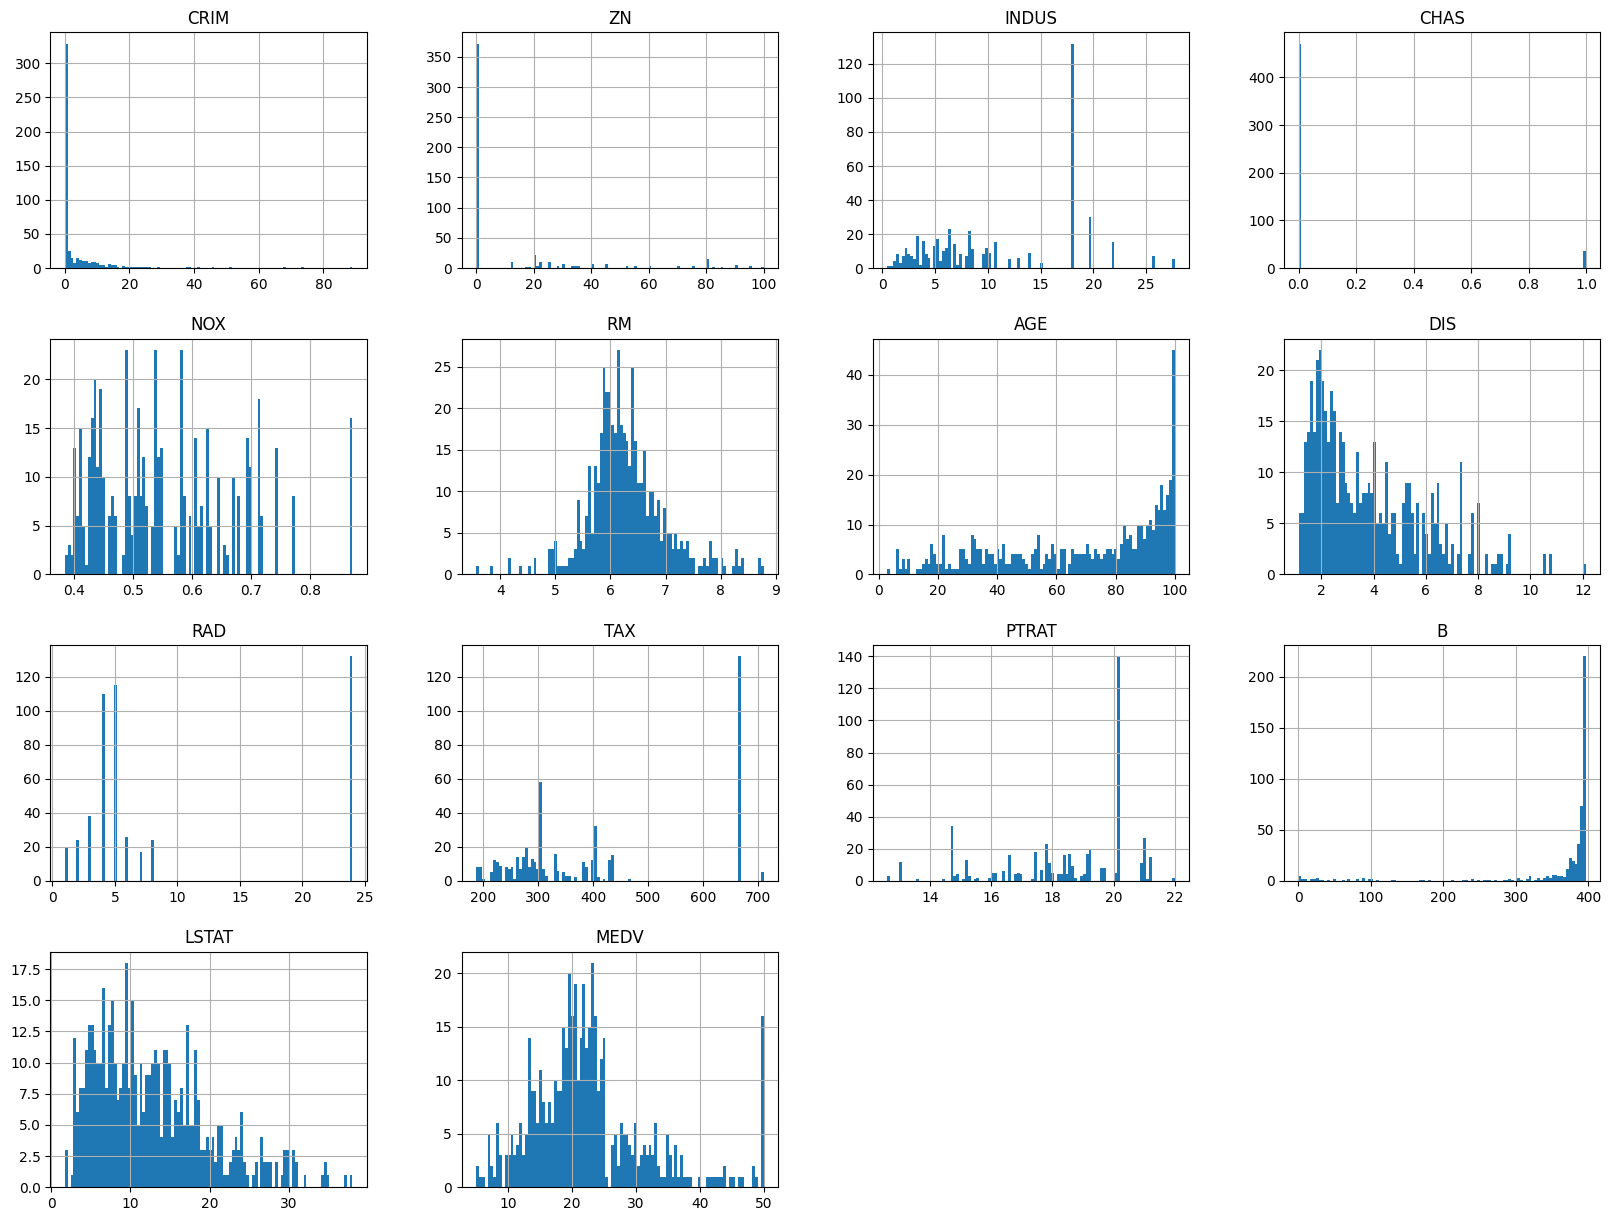

In [ ]:
housing.hist(bins=100,figsize=(20,15))

# ***SPLIT TRAIN TEST***

In [ ]:
def split_train_test(data,test_ratio):
  np.random.seed(42)
  shuffled = np.random.permutation(len(data)) # shuffled is an array of indices (positions) that represent the rows of the dataset.
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled[:test_set_size]
  train_indices = shuffled[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    404 non-null    float64
 1   ZN      404 non-null    float64
 2   INDUS   404 non-null    float64
 3   CHAS    404 non-null    int64  
 4   NOX     404 non-null    float64
 5   RM      400 non-null    float64
 6   AGE     404 non-null    float64
 7   DIS     404 non-null    float64
 8   RAD     404 non-null    int64  
 9   TAX     404 non-null    int64  
 10  PTRAT   404 non-null    float64
 11  B       404 non-null    float64
 12  LSTAT   404 non-null    float64
 13  MEDV    404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [ ]:
housing = strat_train_set.copy()

# ***Correlations***

In [ ]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.676246
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AGE,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

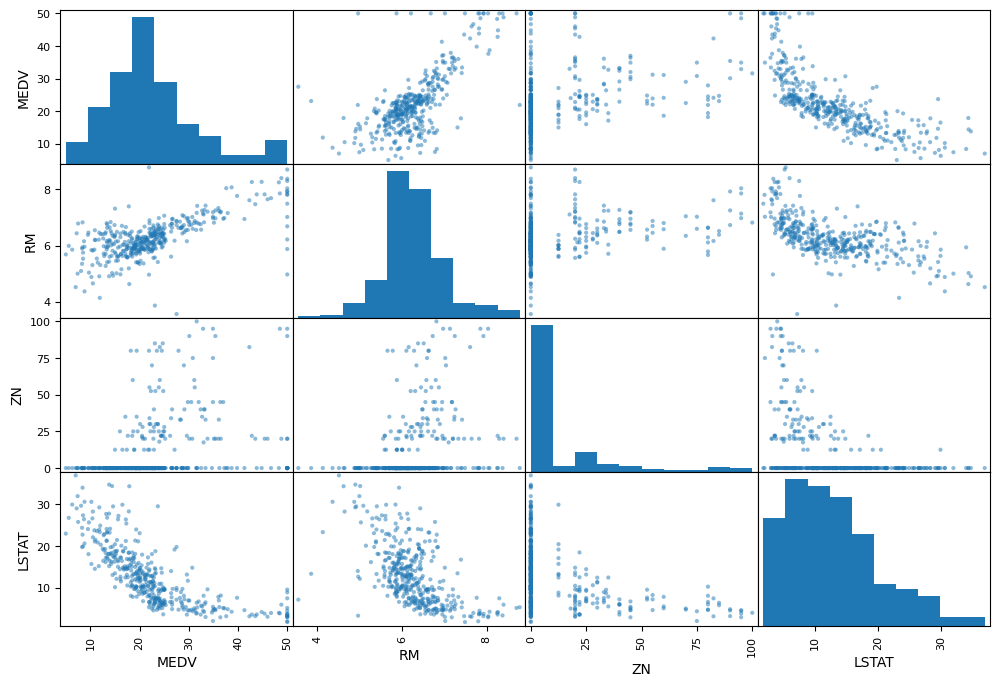

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

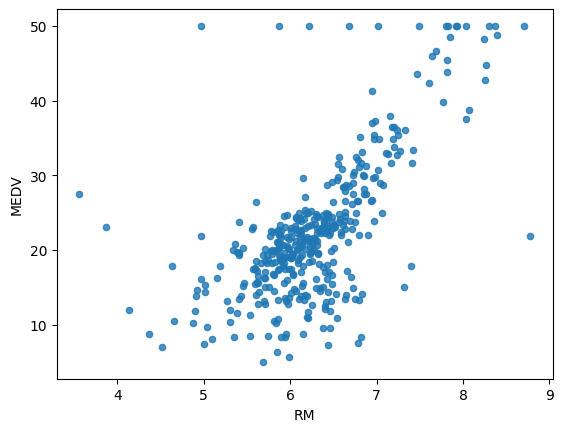

In [ ]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

In [ ]:
housing['TAXRM']= housing['TAX']/housing['RM']

In [ ]:
housing_corr = housing.corr()
housing_corr['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.676246
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AGE,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


In [ ]:
housing=strat_train_set.drop('MEDV',axis=1)
housing_labels = strat_train_set['MEDV'].copy()

# ***Missing Values***

In [ ]:
# 3 things can be done :
# 1. Get rid of the missing data points ( the whole particular row)
# 2. Get rid of the whole attribute ( the whole column)
# 3. Set the value to some value - like 0 or mean or median .

In [ ]:
a = housing.dropna(subset = ['RM']) # option 1
a.shape

(400, 13)

In [ ]:
housing.drop('RM',axis=1).shape # option 2 : note that untill we write "inplace = True", it will not change the original dataframe

(404, 12)

In [ ]:
median = housing['RM'].median() # option 3
housing['RM'].fillna(median)

,RM
254,6.108
348,6.635
476,6.484
321,6.376
326,6.312
...,...
155,6.152
423,6.103
98,7.820
455,6.525


In [ ]:
from sklearn.impute import SimpleImputer # fills up the missing value in any coloumn with its respective median
imputer = SimpleImputer(strategy='median')
imputer.fit(housing) #learn
X= imputer.transform(housing) # fill in
housing_tr = pd.DataFrame(X,columns=housing.columns)

# ***Scikit Learn Design***

In [ ]:
# Primarily 3 Types of objects:
# 1. Estimators - it estimates some parameter based on the dataset. It has a fit method and tranform method eg. Imputer
# It has a fit method and transform method
# fit method - fits the dataset and calculates internal parameters
# eg : You want to guess the average grade of students in a class, but some grades are missing. The estimator learns what might be the missing grades.


# 2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.
# eg:Now, you want to curve the grades (add extra points to everyone). The transformer does this after understanding the grades.

# 3. Predictors - LinearRegression model is an example of predictor
# fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.
# eg: Finally, you want to predict how well future students might do based on their first test scores.



# **Feature scaling**
Primariliy 2 types of feature scaling methods:

1. Min-max (normalisation)

(value-min)/(max-min) the resulting value is between 0 to 1.

2. Standardization

 (value-min)/std
 sklearn provides a class for it called standard scaler


In [ ]:
from sklearn.pipeline import make_pipeline # import the function
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
my_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
my_pipeline.fit(housing)
housing_num_tr= my_pipeline.transform(housing)

# ***Selecting a desired Model***

In [ ]:
housing_num_tr.shape

(404, 13)

In [ ]:
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.352, 25.709, 16.686, 23.337, 23.492])

In [ ]:
some_labels

,MEDV
254,21.9
348,24.5
476,16.7
321,23.1
326,23.0


In [ ]:
## evaluation of model

from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)
rmse

1.2797321530942964

# ***Using better evaluation technique -Cross Validation***

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.947207  , 2.63773414, 4.59055601, 2.40820726, 3.35476638,
       2.63380171, 4.49440659, 3.6624136 , 2.94296931, 3.37669266])

In [ ]:
def print_scores(scores):
  print('Scores:',scores)
  print('Mean:',scores.mean())
  print('Standard Deviation:',scores.std())

In [ ]:
print_scores(rmse_scores)

Scores: [2.947207   2.63773414 4.59055601 2.40820726 3.35476638 2.63380171
 4.49440659 3.6624136  2.94296931 3.37669266]
Mean: 3.3048754663682116
Standard Deviation: 0.7184548219955914


# ***Saving the model***

In [ ]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

# ***Testing the model on test data***

In [ ]:
from typing import final
X_test = strat_test_set.drop('MEDV',axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.8981466356222594